# Analisi esplorativa del training set

Questo notebook presenta l'analisi esplorativa del training set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.decomposition import PCA

# %matplotlib inline

# tune this for bigger figures
pl.rcParams['figure.figsize'] = (14, 14)

Carichiamo il dataset:

In [2]:
dataset_raw = pd.read_excel("./Dataset/finali/integrato.xlsx", sheet_name='ML_finale')

Normalizziamo gli attributi rispetto alla popolazione:

In [3]:
dataset = dataset_raw.copy()
population = dataset['Population']

dataset['CO2 production (kg)'] = dataset['CO2 production (kg)'] / population
dataset['Charcoal consumption (kg)'] = dataset['Charcoal consumption (kg)'] / population
dataset['Fuel oil consumption (kg)'] = dataset['Fuel oil consumption (kg)'] / population

## Statistiche descrittive per il dataset normalizzato

Il dataset contiene 164 istanze di paesi, ognuna con gli attributi

- popolazione
- produzione di CO_2 annuale (in kg)
- consumo di carbone annuale (in kg)
- consumo di carburanti fossili annuale (in kg)
- percentuale di energia rinnovabile utilizzata, rispetto all'utilizzo totale di quel paese

Vediamo come sono distribuite le variabili.

In [4]:
dataset.describe()

,Population,CO2 production (kg),Charcoal consumption (kg),Fuel oil consumption (kg),Renewable energy consumption (percentage)
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000
mean,4.126231e+07,4570.367712,16.195464,238.250565,33.631830
std,1.510147e+08,6870.797196,24.981357,328.506183,29.889872
min,2.958800e+04,44.485376,0.008927,0.518015,0.000000
25%,1.907317e+06,605.355148,1.073189,44.449620,7.524109
50%,8.675396e+06,2031.736292,3.274757,134.621539,25.916058
75%,2.693099e+07,5534.038924,26.290919,291.414967,54.388549
max,1.364270e+09,45423.239959,138.779013,2566.007695,93.859219


Ora vediamo la distribuzione delle features:

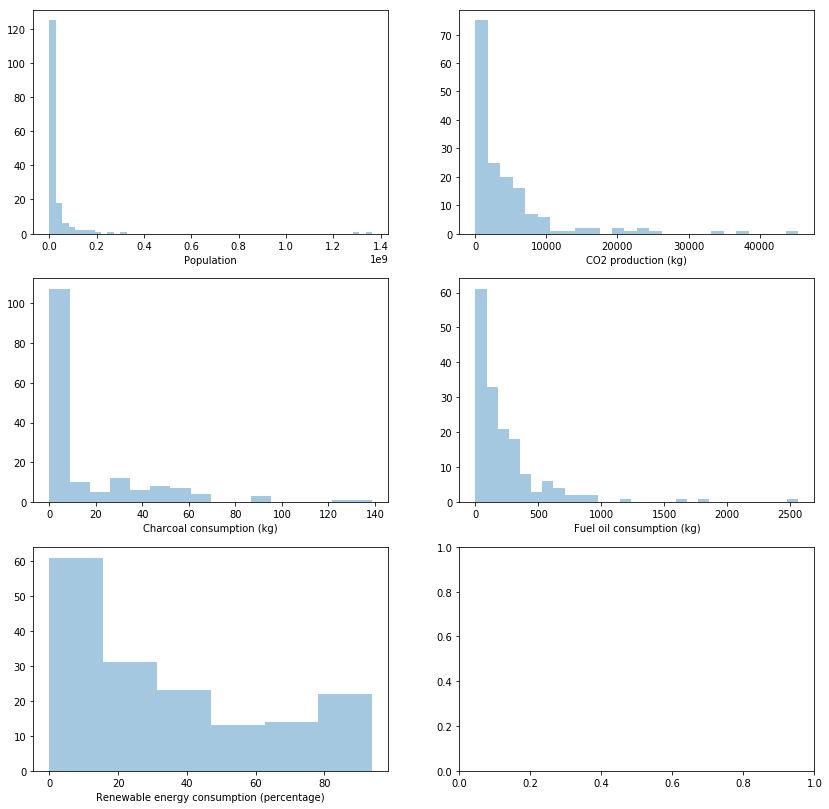

In [5]:
fig, ax = pl.subplots(3, 2)

sns.distplot(dataset['Population'], ax=ax[0, 0], kde=False)
sns.distplot(dataset['CO2 production (kg)'], ax=ax[0, 1], kde=False)
sns.distplot(dataset['Charcoal consumption (kg)'], ax=ax[1, 0], kde=False)
sns.distplot(dataset['Fuel oil consumption (kg)'], ax=ax[1, 1], kde=False)
sns.distplot(dataset['Renewable energy consumption (percentage)'], ax=ax[2, 0], kde=False)
pl.show()

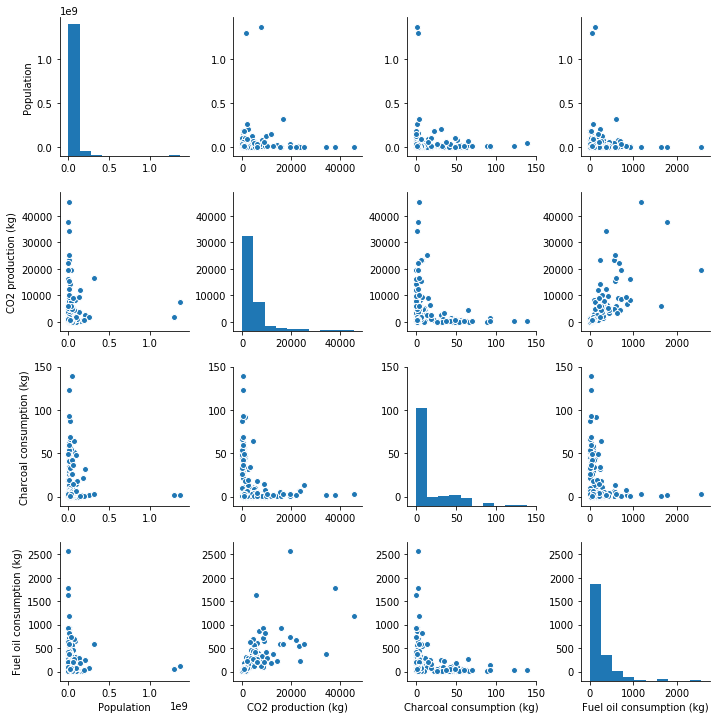

In [6]:
sns.pairplot(dataset.loc[:,['Population',
                            'CO2 production (kg)',
                            'Charcoal consumption (kg)',
                            'Fuel oil consumption (kg)']])
pl.show()

## Correlazione tra features

Esploriamo la correlazione tra le features con una heatmap:

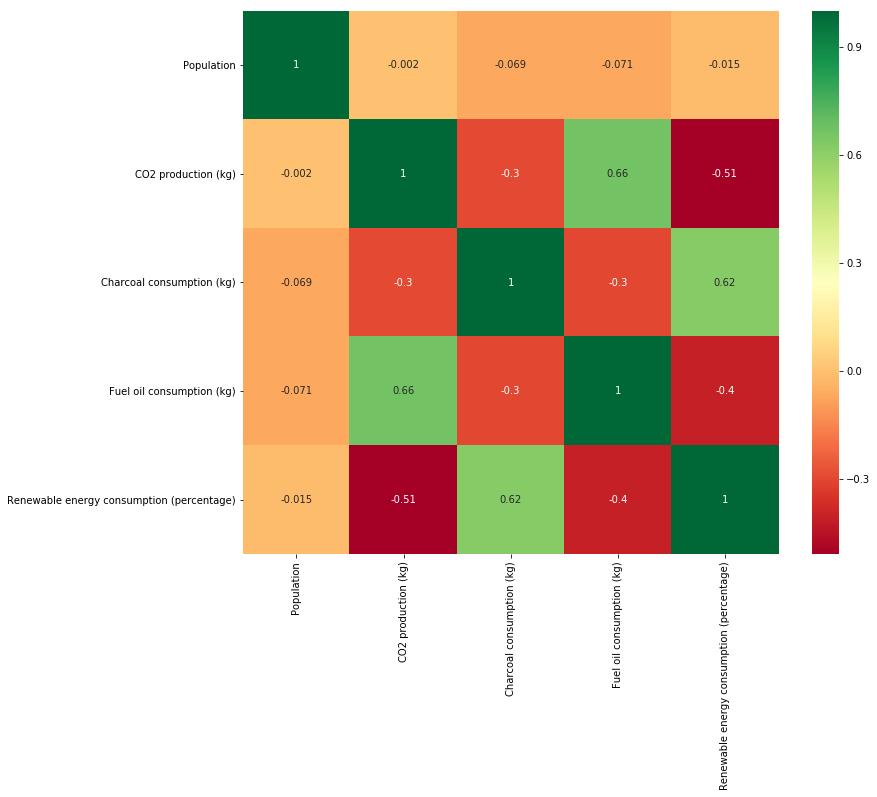

In [7]:
fig, ax = pl.subplots(ncols=1, figsize=(12, 10))
g = sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn")
pl.show()

## Analisi PCA per la varianza spiegata

Vediamo il contributo di ogni feature alla varianza spiegata dei dati:

In [8]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(dataset.loc[:,['CO2 production (kg)',
                                        'Charcoal consumption (kg)',
                                        'Fuel oil consumption (kg)',
                                        'Renewable energy consumption (percentage)']])
pca.explained_variance_ratio_

array([  9.98703041e-01,   1.27134743e-03,   2.00478847e-05,
         5.56324766e-06])

In [9]:
def plot_explained_variance(pca_obj, threshold=0.9):
    n = len(pca_obj.explained_variance_ratio_)
    x_vals = np.arange(n)
    
    # bar chart
    pl.bar(x_vals,
           pca_obj.explained_variance_ratio_,
           alpha=0.5,
           align="center",
           label="Single feature explained variance")
    
    # step plot
    pl.step(x_vals,
            np.cumsum(pca_obj.explained_variance_ratio_),
            where="mid",
            label="Cumulative explained variance")
    
    # threshold
    pl.plot(x_vals,
           threshold * np.ones(x_vals.shape),
           linestyle='--',
           label="{}% threshold".format(threshold * 100))
    
    pl.xlabel("Principal components")
    pl.ylabel("Explained variance ratio")
    pl.legend(loc="center right")
    pl.show()

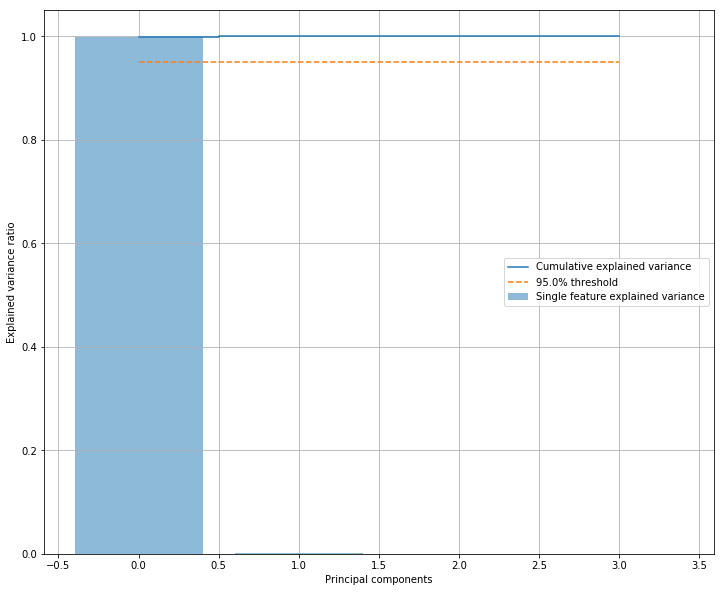

In [10]:
fig, ax = pl.subplots(ncols=1, figsize=(12, 10))
pl.grid(True)
plot_explained_variance(pca, threshold=0.95)

# SOM

In [12]:
from minisom import MiniSom

ModuleNotFoundError: No module named 'minisom'